# Tutorial: Making Plots with Julia

## Overview

This tutorial will give some examples of plotting and plotting features
in Julia, as well as providing references to some relevant resources.
The main plotting library is `Plots.jl`, but there are some others that
provide useful features.

## Some Resources

-   `Plots.jl` [useful
    tips](https://docs.juliaplots.org/latest/basics/#Useful-Tips)
-   `Plots.jl`
    [examples](https://docs.juliaplots.org/latest/generated/gr/)
-   [Plot
    attributes](http://docs.juliaplots.org/latest/generated/attributes_plot/)
-   [Axis
    attributes](http://docs.juliaplots.org/latest/generated/attributes_axis/#Axis)
-   [Color
    names](http://juliagraphics.github.io/Colors.jl/stable/namedcolors/)

## Demos

In [1]:
using Plots
using Random
Random.seed!(1);

### Line Plots

To generate a basic line plot, use `plot`.


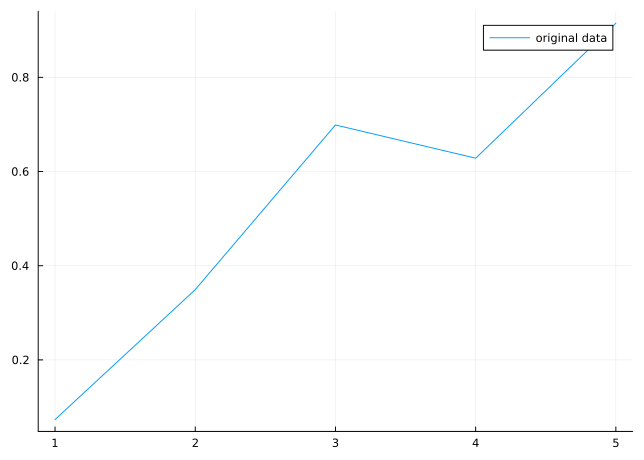

In [1]:
y = rand(5)
plot(y, label="original data", legend=:topright)

There’s a lot of customization here that can occur, a lot of which is
discussed in the docs or can be found with some Googling.

### Adding Plot Elements

Now we can add some other lines and point markers.


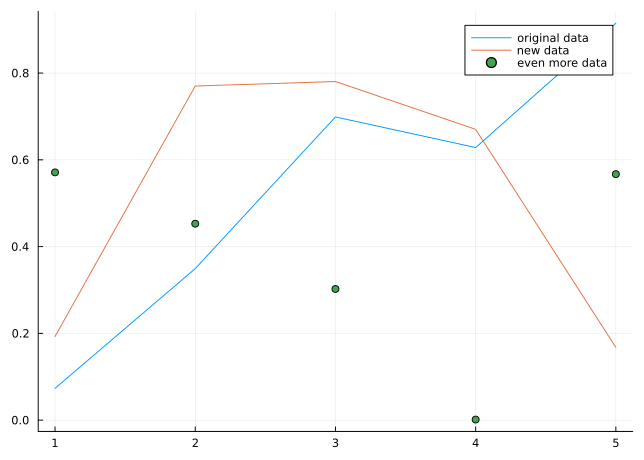

In [1]:
y2 = rand(5)
y3 = rand(5)
plot!(y2, label="new data")
scatter!(y3, label="even more data")

Remember that an exclamation mark (!) at the end of a function name
means that function modifies an object in-place, so `plot!` and
`scatter!` modify the current plotting object, they don’t create a new
plot.

### Removing Plot Elements

Sometimes we want to remove legends, axes, grid lines, and ticks.


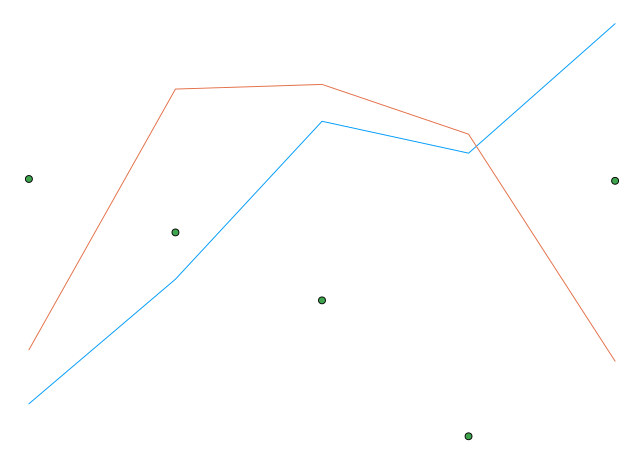

In [1]:
plot!(legend=false, axis=false, grid=false, ticks=false)

### Aspect Ratio

If we want to have a square aspect ratio, use `ratio = 1`.


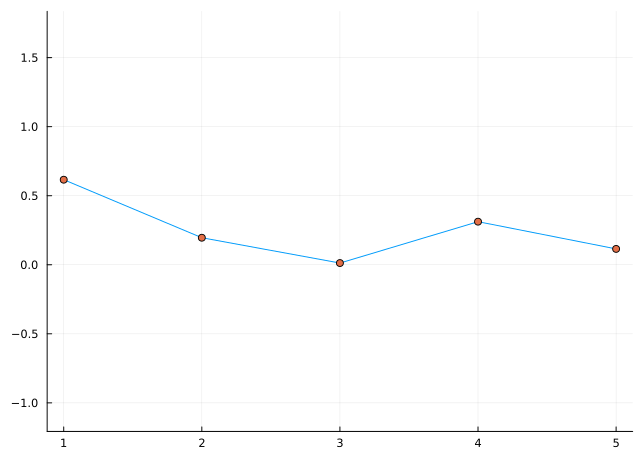

In [1]:
v = rand(5)
plot(v, ratio=1, legend=false)
scatter!(v)

### Heatmaps

A heatmap is effectively a plotted matrix with colors chosen according
to the values. Use `clim` to specify a fixed range for the color limits.


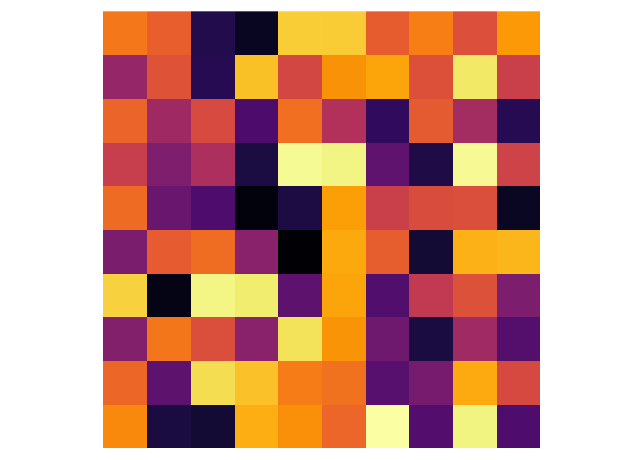

In [1]:
A = rand(10, 10)
heatmap(A, clim=(0, 1), ratio=1, legend=false, axis=false, ticks=false)


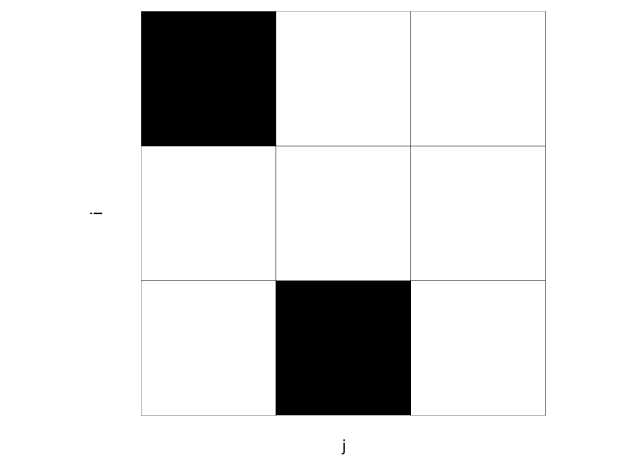

In [1]:
M = [ 0 1 0; 0 0 0; 1 0 0]
whiteblack = [RGBA(1,1,1,0), RGB(0,0,0)]
heatmap(c=whiteblack, M, aspect_ratio = 1, ticks=.5:3.5, lims=(.5,3.5), gridalpha=1, legend=false, axis=false, ylabel="i", xlabel="j")

#### Custom Colors


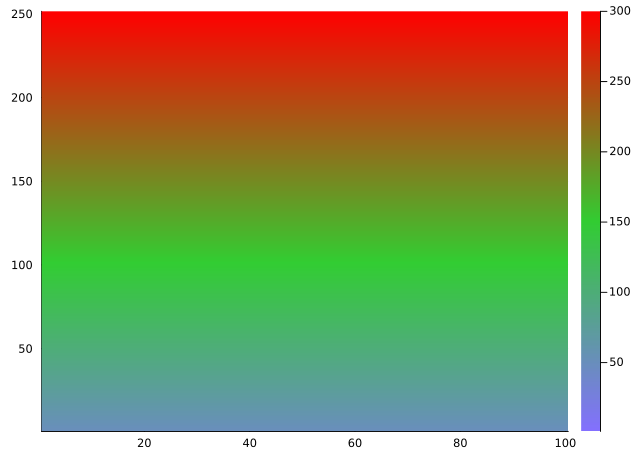

In [1]:
using Colors

mycolors = [colorant"lightslateblue",colorant"limegreen",colorant"red"]
A = [i for i=50:300, j=1:100]
heatmap(A, c=mycolors, clim=(1,300))

### Plotting Areas Under Curves


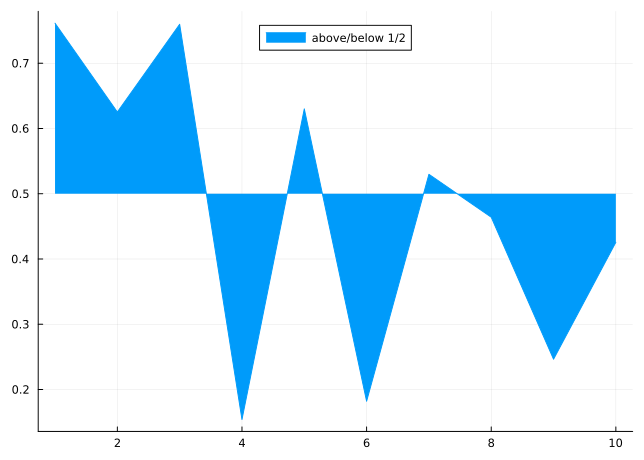

In [1]:
y = rand(10)
plot(y, fillrange= y.*0 .+ .5, label= "above/below 1/2", legend =:top)


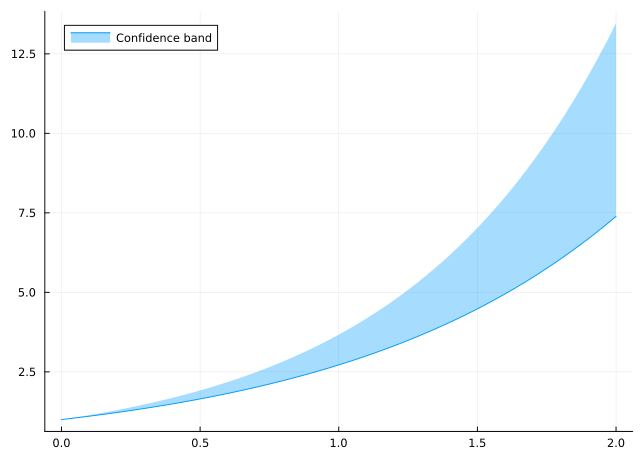

In [1]:
x = LinRange(0,2,100)
y1 = exp.(x)
y2 = exp.(1.3 .* x)
plot(x, y1, fillrange = y2, fillalpha = 0.35, c = 1, label = "Confidence band", legend = :topleft)


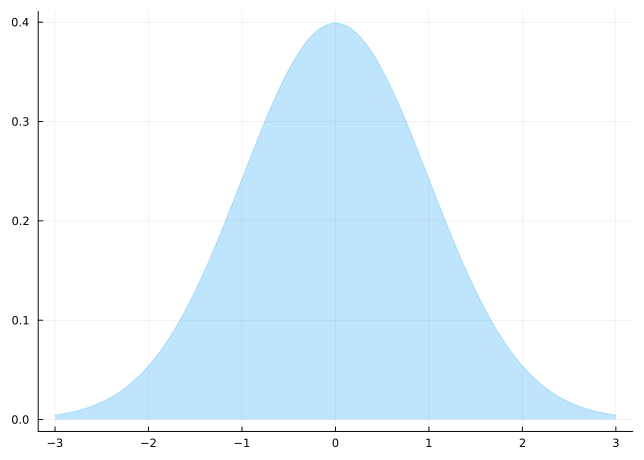

In [1]:
x = -3:.01:3
areaplot(x, exp.(-x.^2/2)/√(2π),alpha=.25,legend=false)


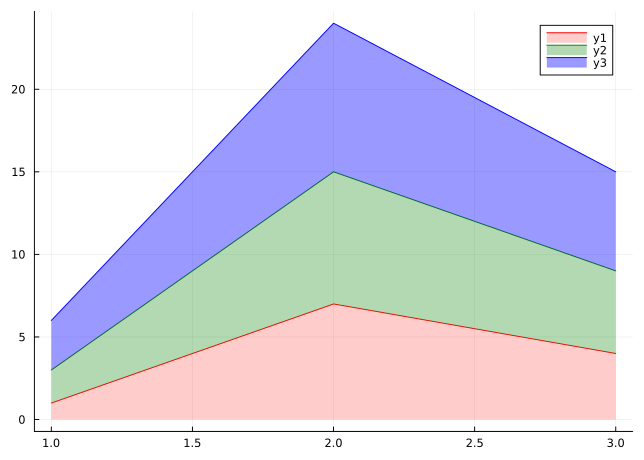

In [1]:
M = [1 2 3; 7 8 9; 4 5 6; 0 .5 1.5]
areaplot(1:3, M, seriescolor = [:red :green :blue ], fillalpha = [0.2 0.3 0.4])


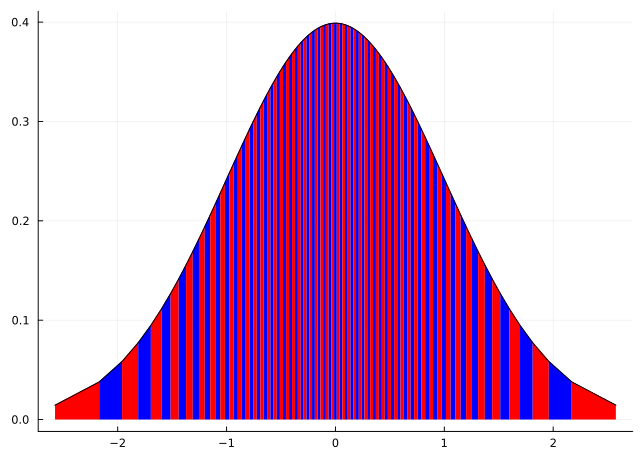

In [1]:
using SpecialFunctions
f = x->exp(-x^2/2)/√(2π)
δ = .01
plot()
x = √2 .* erfinv.(2 .*(δ/2 : δ : 1) .- 1)
areaplot(x, f.(x), seriescolor=[ :red,:blue], legend=false)
plot!(x, f.(x),c=:black)

### Plotting Shapes


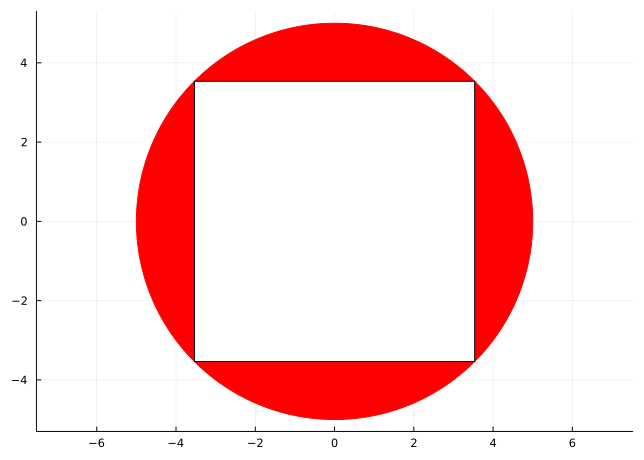

In [1]:
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
circle(r,x,y) = (θ = LinRange(0,2π,500); (x.+r.*cos.(θ), y.+r.*sin.(θ)))
plot(circle(5,0,0), ratio=1, c=:red, fill=true)
plot!(rectangle(5*√2,5*√2,-2.5*√2,-2.5*√2),c=:white,fill=true,legend=false)

### Plotting Distributions

The
[`StatsPlots.jl`](https://github.com/JuliaPlots/StatsPlots.jl/blob/master/README.md)
package is very useful for making various plots of probability
distributions.


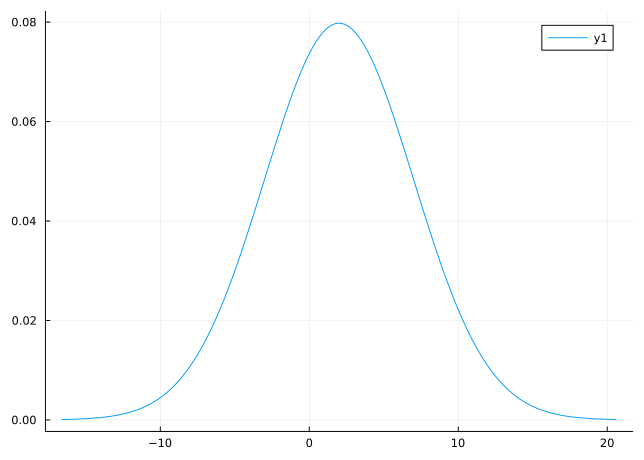

In [1]:
using Distributions, StatsPlots
plot(Normal(2, 5))


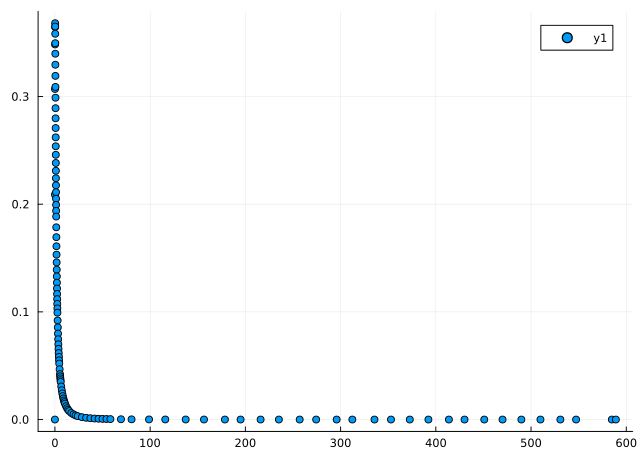

In [1]:
scatter(LogNormal(0.8, 1.5))

We can also use this functionality to plot distributions of data in
tabular data structures like `DataFrames`.


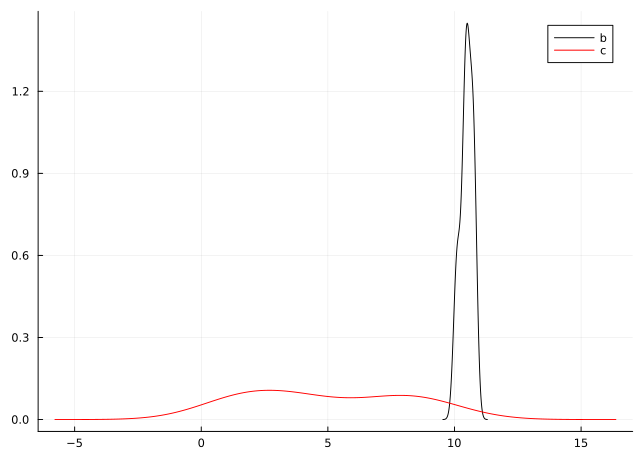

In [1]:
using DataFrames
dat = DataFrame(a = 1:10, b = 10 .+ rand(10), c = 10 .* rand(10))
@df dat density([:b :c], color=[:black :red])

### Editing Plots Manually


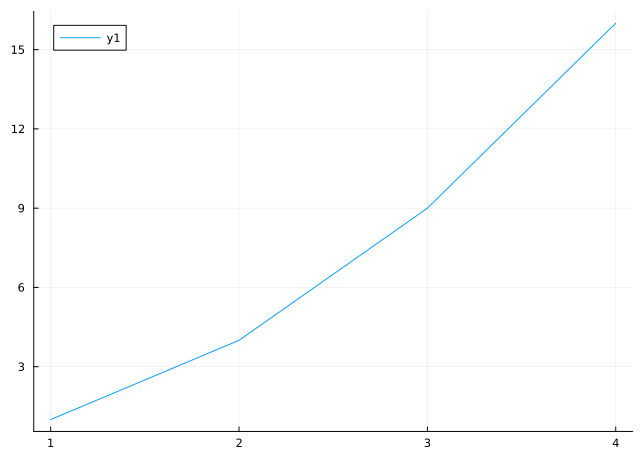

In [1]:
pl = plot(1:4,[1, 4, 9, 16])

In [1]:
pl.attr

RecipesPipeline.DefaultsDict with 30 entries:
  :dpi                      => 96
  :background_color_outside => :match
  :plot_titlefontvalign     => :vcenter
  :warn_on_unsupported      => true
  :background_color         => RGBA{Float64}(1.0, 1.0, 1.0, 1.0)
  :inset_subplots           => nothing
  :size                     => (672, 480)
  :display_type             => :auto
  :overwrite_figure         => true
  :html_output_format       => :auto
  :plot_titlefontfamily     => :match
  :plot_titleindex          => 0
  :foreground_color         => RGB{N0f8}(0.0, 0.0, 0.0)
  :window_title             => "Plots.jl"
  :plot_titlefontrotation   => 0.0
  :extra_plot_kwargs        => Dict{Any, Any}()
  :pos                      => (0, 0)
  :plot_titlefonthalign     => :hcenter
  :tex_output_standalone    => false
  ⋮                         => ⋮

In [1]:
pl.series_list[1]

Plots.Series(RecipesPipeline.DefaultsDict(:plot_object => Plot{Plots.GRBackend() n=1}, :subplot => Subplot{1}, :label => "y1", :fillalpha => nothing, :linealpha => nothing, :linecolor => RGBA{Float64}(0.0, 0.6056031704619725, 0.9786801190138923, 1.0), :x_extrema => (NaN, NaN), :series_index => 1, :markerstrokealpha => nothing, :markeralpha => nothing…))

In [1]:
pl[:size]=(300,200)

(300, 200)


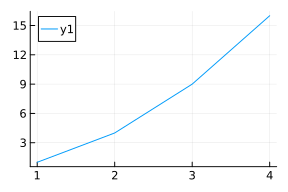

In [1]:
pl

### Log-Scaled Axes


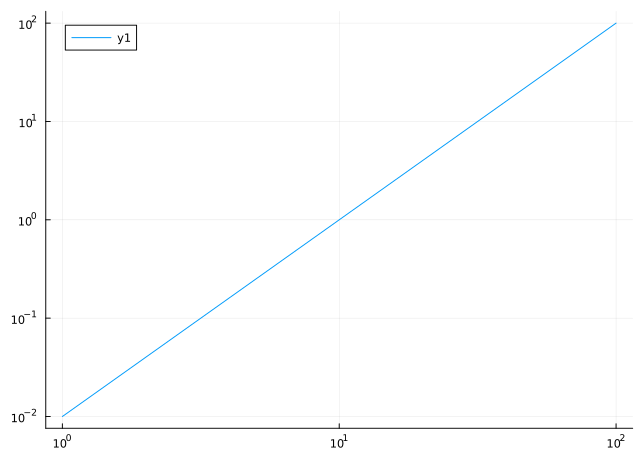

In [1]:
xx = .1:.1:10
plot(xx.^2, xaxis=:log, yaxis=:log)


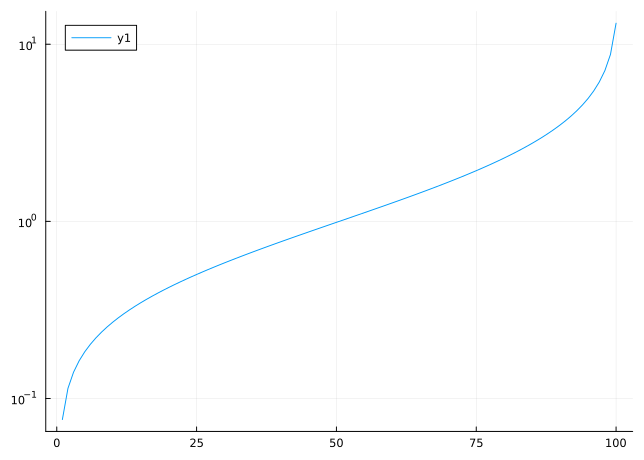

In [1]:
plot(exp.(x), yaxis=:log)